In [1]:
from MMDtest import MMDtest
from rMMDtest import rMMDtest
from bMMDtest import bMMDtest
from lMMDtest import lMMDtest
from incMMDtest import incMMDtest

from sampler_perturbations import sampler_perturbations
from utils import median_heuristic
from utils import result_viewer

import numpy as np
import jax
import jax.numpy as jnp
import itertools
from jax import vmap, random, jit
from tqdm.auto import tqdm
from functools import partial

In [2]:
repetitions = 2000 

rMMDtest_1=partial(rMMDtest, R=10)
rMMDtest_2=partial(rMMDtest, R=200)
incMMDtest_1=partial(incMMDtest, R=100)
incMMDtest_2=partial(incMMDtest, R=200)

tests = (MMDtest, rMMDtest_1, rMMDtest_2, incMMDtest_1, incMMDtest_2, lMMDtest, bMMDtest)

In [3]:
def PU_experiment(sample_sizes,params_interest,experiment_type):

    varying = sample_sizes if len(sample_sizes)>=2 else params_interest
    itertable = np.array([x for x in itertools.product(np.atleast_1d(sample_sizes),np.atleast_1d(params_interest))])
    sample_sizes = itertable[:,0]
    params_interest = itertable[:,1]
    
    outputs = np.zeros((len(tests), len(itertable), repetitions))
    outputs = outputs.tolist()
    key = random.PRNGKey(29)
    seed = 29
    for iter in tqdm(range(len(itertable))):     
        for rep in tqdm(range(repetitions)):
            if experiment_type == 'dimension=1':
                key, subkey = random.split(key)
                X, Y = sampler_perturbations(m=sample_sizes[iter].astype(int), 
                                             n=sample_sizes[iter].astype(int), 
                                             d=1, 
                                             scale=params_interest[iter], 
                                             number_perturbations=2, 
                                             seed=seed)


            elif experiment_type == 'dimension=2':
                key, subkey = random.split(key)
                X, Y = sampler_perturbations(m=sample_sizes[iter].astype(int), 
                                             n=sample_sizes[iter].astype(int), 
                                             d=2, 
                                             scale=params_interest[iter], 
                                             number_perturbations=1, 
                                             seed=seed)
    
            bw = median_heuristic(X, Y, "l2")
            
            key, subkey = random.split(key)
            seed += 1
            for t in range(len(tests)):
                outputs[t][iter][rep] = tests[t](
                    X,
                    Y,
                    subkey,
                    seed,
                    bandwidth = bw,
                    B = 199
                )
    
    power = np.mean(np.array(outputs), -1)
    return power, varying

### vary scale d=1

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

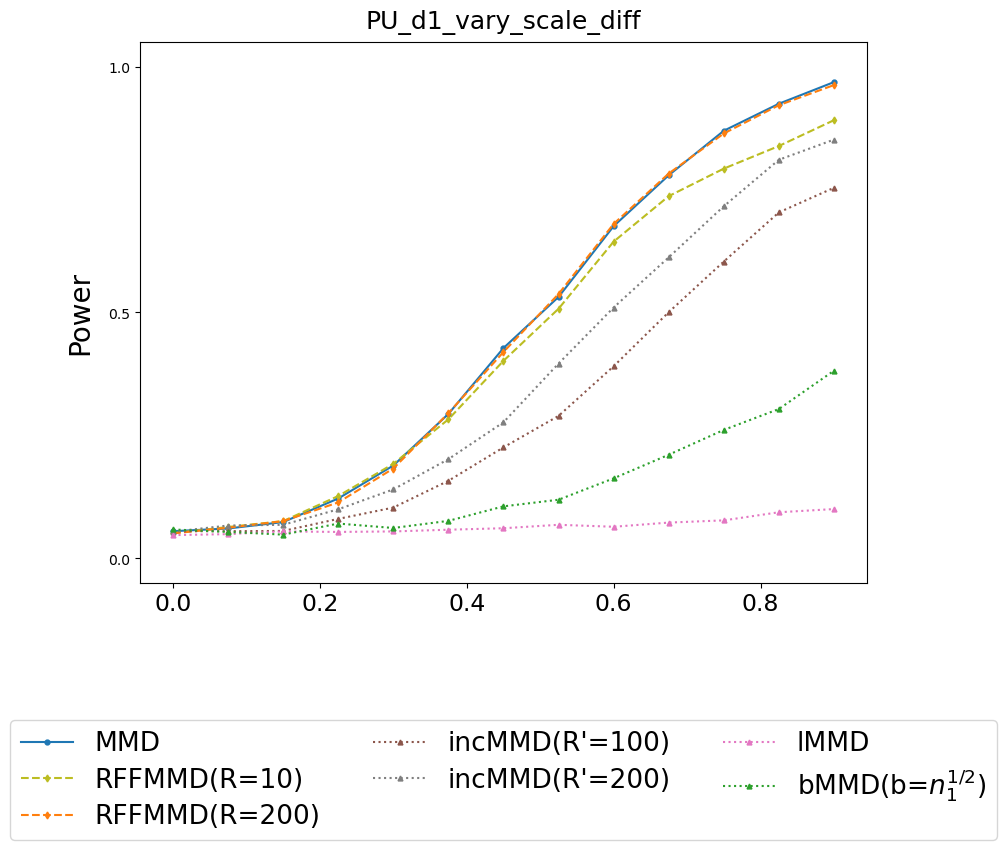

In [4]:
sample_sizes = np.array([1000])
params_interest = scale = np.linspace(0,0.9,13)
experiment_name = "PU_d1_vary_scale_diff"

power,varying = PU_experiment(sample_sizes,params_interest,'dimension=1')
np.save(f"results/{experiment_name}_power.npy", power)
np.save(f"results/{experiment_name}_varying.npy", varying)

result_viewer(experiment_name)

### vary size d=1 size

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

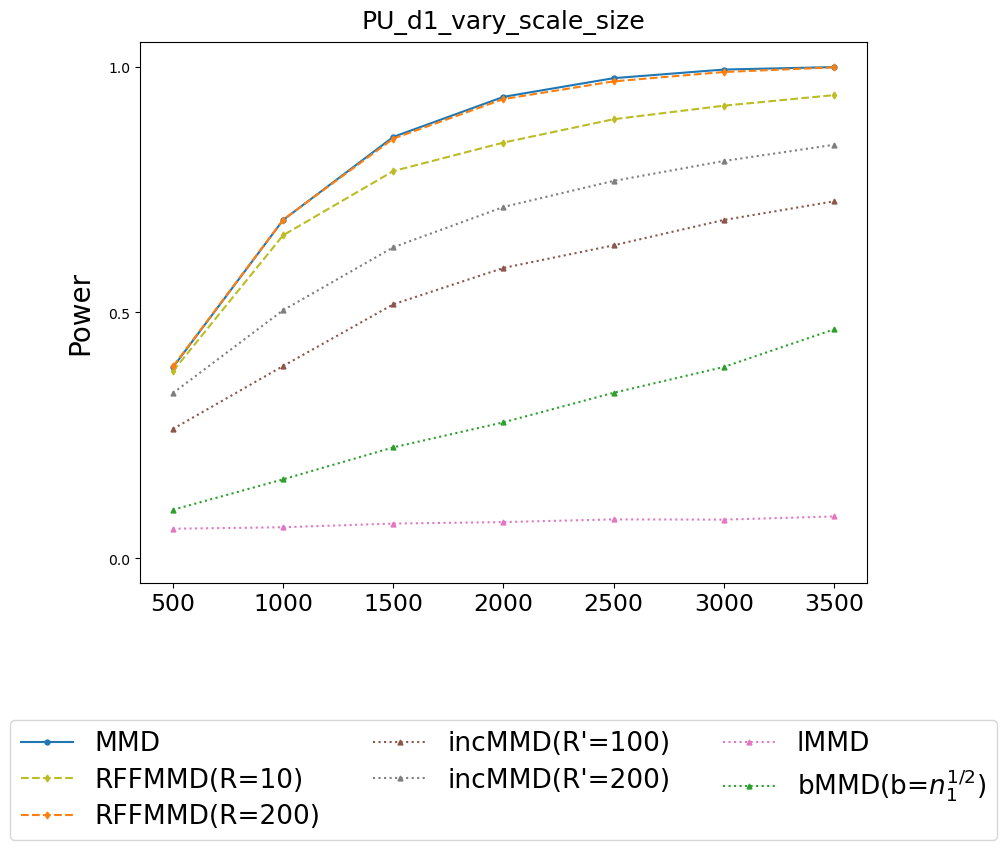

In [5]:
sample_sizes = np.arange(500,3501,500)
params_interest = scale = np.array([0.6])
experiment_name = "PU_d1_vary_scale_size"

power,varying = PU_experiment(sample_sizes,params_interest,'dimension=1')
np.save(f"results/{experiment_name}_power.npy", power)
np.save(f"results/{experiment_name}_varying.npy", varying)

result_viewer(experiment_name)

### vary scale d=2

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

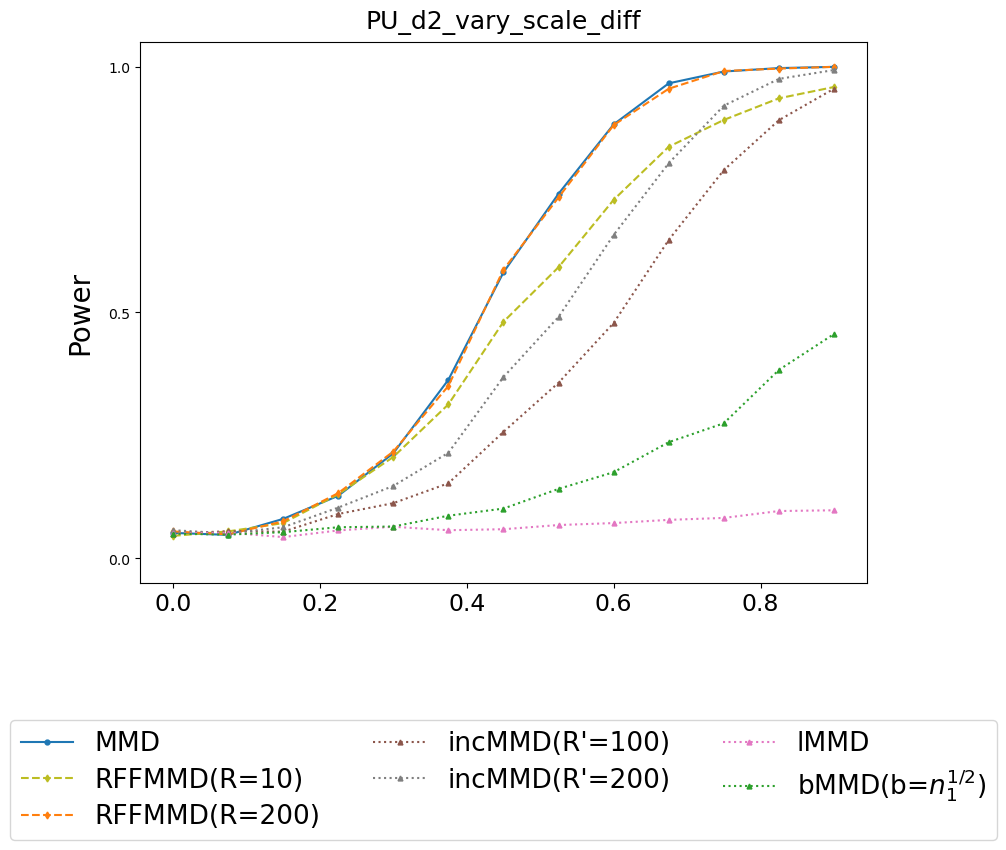

In [6]:
sample_sizes = np.array([1000])
params_interest = scale = np.linspace(0,0.9,13)
experiment_name = "PU_d2_vary_scale_diff"

power,varying = PU_experiment(sample_sizes,params_interest,'dimension=2')
np.save(f"results/{experiment_name}_power.npy", power)
np.save(f"results/{experiment_name}_varying.npy", varying)

result_viewer(experiment_name)

### vary size d=2 size

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

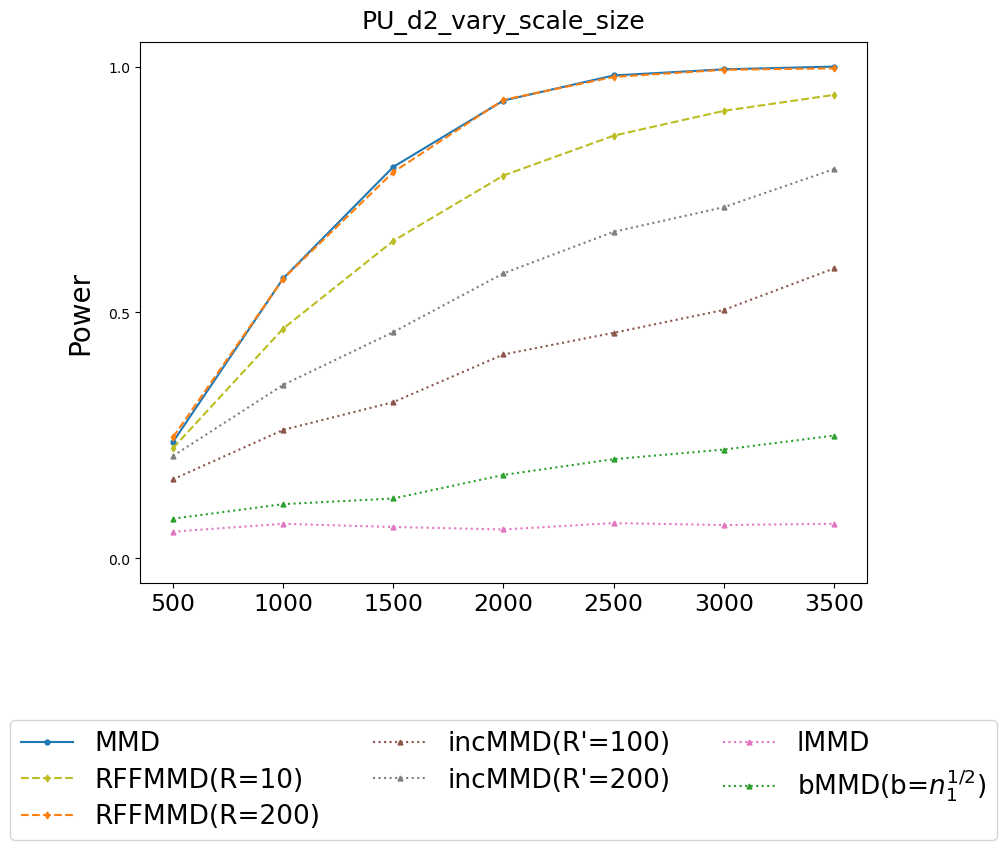

In [7]:
sample_sizes = np.arange(500,3501,500)
params_interest = scale = np.array([0.45])
experiment_name = "PU_d2_vary_scale_size"

power,varying = PU_experiment(sample_sizes,params_interest,'dimension=2')
np.save(f"results/{experiment_name}_power.npy", power)
np.save(f"results/{experiment_name}_varying.npy", varying)

result_viewer(experiment_name)